In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#import statsmodels.api as sm
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from scipy import stats
import scipy as sc
import xgboost as xgb
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from math import log2
from os import listdir
from functools import reduce
from collections import Counter, defaultdict
from random import choice, shuffle
from nltk.tokenize import regexp_tokenize

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, classification_report, f1_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

import sys
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import MultiLabelBinarizer
porter = PorterStemmer()
lancaster=LancasterStemmer()
seaborn.set()
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score




In [2]:
df_tomato = pd.read_csv("rotten_tomatoes_movies.csv", index_col=0)
df_tomato.head()

,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,in_theaters_date,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
rotten_tomatoes_link,,,,,,,,,,,,,,,,,,,,,
/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3


In [3]:
df_x = pd.read_csv("inputInfo_X.csv")
df_y = pd.read_csv("inputInfo_Y.csv")

In [4]:
df_x

,title,year,date_published,genre_x,duration,country,director,writer,production_company,actors,budget,rating
0,Kate & Leopold,2001,1017964800000000000,"Comedy, Fantasy, Romance",118,USA,James Mangold,"Steven Rogers, James Mangold",Konrad Pictures,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",48000000,1
1,Tusk,1980,344044800000000000,Drama,119,France,Alejandro Jodorowsky,"Reginald Campbell, Nicholas Niciphor",Yang Films,"Cyrielle Clair, Anton Diffring, Serge Merlin, ...",1500000,2
2,Tusk,2014,1411084800000000000,"Comedy, Drama, Horror",102,USA,Kevin Smith,Kevin Smith,SModcast Pictures,"Michael Parks, Justin Long, Genesis Rodriguez,...",3000000,2
3,The Border,1982,382320000000000000,"Crime, Drama, Western",108,USA,Tony Richardson,"Deric Washburn, Walon Green",Efer Productions,"Jack Nicholson, Harvey Keitel, Valerie Perrine...",22000000,2
4,Monster,2003,1081468800000000000,"Biography, Crime, Drama",109,"Germany, USA",Patty Jenkins,Patty Jenkins,Media 8 Entertainment,"Charlize Theron, Christina Ricci, Bruce Dern, ...",8000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6463,A Dog's Journey,2019,1556841600000000000,"Comedy, Drama, Family",109,"China, India, Hong Kong, USA",Gail Mancuso,"W. Bruce Cameron, Cathryn Michon",DreamWorks,"Josh Gad, Dennis Quaid, Kathryn Prescott, Marg...",16000000,3
6464,Killers Anonymous,2019,1561680000000000000,"Action, Crime, Mystery",95,UK,Martin Owen,"Seth Johnson, Elizabeth Morris",Goldfinch,"Tommy Flanagan, Rhyon Nicole Brown, MyAnna Bur...",15000000,2
6465,Midsommar,2019,1562112000000000000,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary",Ari Aster,Ari Aster,Proton Cinema,"Florence Pugh, Jack Reynor, Vilhelm Blomgren, ...",10000000,2
6466,Sextuplets,2019,1565913600000000000,Comedy,97,USA,Michael Tiddes,"Rick Alvarez, Mike Glock",Wayans Alvarez Productions,"Marlon Wayans, Bresha Webb, Michael Ian Black,...",32000000,4


In [5]:
df_y.columns

Index(['avg_vote', 'metascore', 'reviews_from_users', 'reviews_from_critics',
       'tomatometer_rating', 'audience_rating'],
      dtype='object')

In [6]:
df_x.head()

,title,year,date_published,genre_x,duration,country,director,writer,production_company,actors,budget,rating
0,Kate & Leopold,2001,1017964800000000000,"Comedy, Fantasy, Romance",118,USA,James Mangold,"Steven Rogers, James Mangold",Konrad Pictures,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",48000000,1
1,Tusk,1980,344044800000000000,Drama,119,France,Alejandro Jodorowsky,"Reginald Campbell, Nicholas Niciphor",Yang Films,"Cyrielle Clair, Anton Diffring, Serge Merlin, ...",1500000,2
2,Tusk,2014,1411084800000000000,"Comedy, Drama, Horror",102,USA,Kevin Smith,Kevin Smith,SModcast Pictures,"Michael Parks, Justin Long, Genesis Rodriguez,...",3000000,2
3,The Border,1982,382320000000000000,"Crime, Drama, Western",108,USA,Tony Richardson,"Deric Washburn, Walon Green",Efer Productions,"Jack Nicholson, Harvey Keitel, Valerie Perrine...",22000000,2
4,Monster,2003,1081468800000000000,"Biography, Crime, Drama",109,"Germany, USA",Patty Jenkins,Patty Jenkins,Media 8 Entertainment,"Charlize Theron, Christina Ricci, Bruce Dern, ...",8000000,2


In [7]:
df_y.head()

,avg_vote,metascore,reviews_from_users,reviews_from_critics,tomatometer_rating,audience_rating
0,6.4,44.0,330.0,127.0,50,62.0
1,5.0,NaN,5.0,5.0,45,36.0
2,5.3,55.0,381.0,273.0,45,36.0
3,6.4,66.0,44.0,32.0,80,53.0
4,7.3,74.0,555.0,192.0,81,81.0


In [8]:
df_y.isna().sum()

avg_vote                   0
metascore               1215
reviews_from_users        10
reviews_from_critics      28
tomatometer_rating         0
audience_rating           28
dtype: int64

In [9]:

#change this
#df_y = df_y.drop(['avg_vote', 'metascore','reviews_from_users','reviews_from_critics','audience_rating'], axis=1)


In [10]:
#1 = Fresh, 0 = Rotten
df_y['R_F'] = (df_y['tomatometer_rating'] > 60).astype(int)
df_y

,avg_vote,metascore,reviews_from_users,reviews_from_critics,tomatometer_rating,audience_rating,R_F
0,6.4,44.0,330.0,127.0,50,62.0,0
1,5.0,NaN,5.0,5.0,45,36.0,0
2,5.3,55.0,381.0,273.0,45,36.0,0
3,6.4,66.0,44.0,32.0,80,53.0,1
4,7.3,74.0,555.0,192.0,81,81.0,1
...,...,...,...,...,...,...,...
6463,7.4,43.0,125.0,54.0,50,92.0,0
6464,6.1,22.0,51.0,20.0,0,22.0,0
6465,7.2,72.0,1454.0,365.0,83,63.0,1
6466,4.4,21.0,166.0,19.0,14,38.0,0


In [11]:
df_y.isna().sum()

avg_vote                   0
metascore               1215
reviews_from_users        10
reviews_from_critics      28
tomatometer_rating         0
audience_rating           28
R_F                        0
dtype: int64

In [12]:
df_x.isna().sum()

title                  0
year                   0
date_published         0
genre_x                0
duration               0
country                0
director               0
writer                 7
production_company    37
actors                 1
budget                 0
rating                 0
dtype: int64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf

In [14]:
for col in df_x:
    print(df_x[col].unique())

['Kate & Leopold' 'Tusk' 'The Border' ... 'Midsommar' 'Sextuplets'
 'Unplanned']
[2001 1980 2014 1982 2003 2019 2018 2008 2009 2005 1999 2016 2012 2010
 1983 2006 1981 2002 2013 2011 1996 1989 2015 1988 1995 1997 1991 1984
 1987 1985 2007 2004 1986 1994 2017 1998 2000 1990 1992 1993]
[1017964800000000000  344044800000000000 1411084800000000000 ...
 1562716800000000000 1562112000000000000 1570147200000000000]
['Comedy, Fantasy, Romance' 'Drama' 'Comedy, Drama, Horror'
 'Crime, Drama, Western' 'Biography, Crime, Drama' 'Comedy, Drama, Family'
 'Crime, Drama, Romance' 'Comedy' 'Crime, Drama, Mystery' 'Action, Comedy'
 'Action, Adventure, Sci-Fi' 'Drama, War' 'Adventure, Drama, Romance'
 'Adventure, Comedy, Crime' 'Action, Adventure, Comedy' 'Crime, Drama'
 'Comedy, Sport' 'Biography, Comedy, Musical' 'Horror, Sci-Fi'
 'Comedy, Romance' 'Action, Drama, History' 'Comedy, Drama, Romance'
 'Mystery, Thriller' 'Biography, Drama' 'Action, Adventure, Fantasy'
 'Action, Crime, Drama' 'Comedy, Dra

In [15]:
df_x.columns

Index(['title', 'year', 'date_published', 'genre_x', 'duration', 'country',
       'director', 'writer', 'production_company', 'actors', 'budget',
       'rating'],
      dtype='object')

In [16]:
list_of_directors = df_x['director'].unique()
print(len(list_of_directors))

2939


In [17]:
df_x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 12 columns):
title                 6468 non-null object
year                  6468 non-null int64
date_published        6468 non-null int64
genre_x               6468 non-null object
duration              6468 non-null int64
country               6468 non-null object
director              6468 non-null object
writer                6461 non-null object
production_company    6431 non-null object
actors                6467 non-null object
budget                6468 non-null int64
rating                6468 non-null int64
dtypes: int64(5), object(7)
memory usage: 606.5+ KB


In [18]:
#Uncomment the three below
# df_x['genre_x'] = df_x.genre_x.apply(lambda x: x.split(','))
# df_x['country'] = df_x.country.apply(lambda x: x.split(','))
# df_x['director'] = df_x.director.apply(lambda x: x.split(','))

#df_x['actors'] = df_x.actors.apply(lambda x: x.split(','))

for col in df_x:
    print(df_x[col])

0          Kate & Leopold
1                    Tusk
2                    Tusk
3              The Border
4                 Monster
              ...        
6463      A Dog's Journey
6464    Killers Anonymous
6465            Midsommar
6466           Sextuplets
6467            Unplanned
Name: title, Length: 6468, dtype: object
0       2001
1       1980
2       2014
3       1982
4       2003
        ... 
6463    2019
6464    2019
6465    2019
6466    2019
6467    2019
Name: year, Length: 6468, dtype: int64
0       1017964800000000000
1        344044800000000000
2       1411084800000000000
3        382320000000000000
4       1081468800000000000
               ...         
6463    1556841600000000000
6464    1561680000000000000
6465    1562112000000000000
6466    1565913600000000000
6467    1570147200000000000
Name: date_published, Length: 6468, dtype: int64
0       Comedy, Fantasy, Romance
1                          Drama
2          Comedy, Drama, Horror
3          Crime, Drama, Western
4 

In [19]:
for col in df_x:
    print(df_x[col])

0          Kate & Leopold
1                    Tusk
2                    Tusk
3              The Border
4                 Monster
              ...        
6463      A Dog's Journey
6464    Killers Anonymous
6465            Midsommar
6466           Sextuplets
6467            Unplanned
Name: title, Length: 6468, dtype: object
0       2001
1       1980
2       2014
3       1982
4       2003
        ... 
6463    2019
6464    2019
6465    2019
6466    2019
6467    2019
Name: year, Length: 6468, dtype: int64
0       1017964800000000000
1        344044800000000000
2       1411084800000000000
3        382320000000000000
4       1081468800000000000
               ...         
6463    1556841600000000000
6464    1561680000000000000
6465    1562112000000000000
6466    1565913600000000000
6467    1570147200000000000
Name: date_published, Length: 6468, dtype: int64
0       Comedy, Fantasy, Romance
1                          Drama
2          Comedy, Drama, Horror
3          Crime, Drama, Western
4 

In [20]:
#Current Rating Column Labels 
#1= PG-13; 2= R; 3= PG; 4= R; 5= G; 6= Adult Only
#Transform to "Age Rating" Column Labels
#1= G; 2=PG; 3= PG-13; 4=R; 5= Adult Only
#df_x['rating'] = (df_x['rating'] == 1).astype(int)
df_x.loc[df_x["rating"]==5, 'age_rating'] = 1
df_x.loc[df_x["rating"]==3, 'age_rating'] = 2
df_x.loc[df_x["rating"]==1, 'age_rating'] = 3
df_x.loc[df_x["rating"]==2, 'age_rating'] = 4
df_x.loc[df_x["rating"]==4, 'age_rating'] = 4
df_x.loc[df_x["rating"]==6, 'age_rating'] = 5
df_x['age_rating'] = (df_x['age_rating']).astype(int)
df_x = df_x.drop(["rating"],axis=1)
df_x

,title,year,date_published,genre_x,duration,country,director,writer,production_company,actors,budget,age_rating
0,Kate & Leopold,2001,1017964800000000000,"Comedy, Fantasy, Romance",118,USA,James Mangold,"Steven Rogers, James Mangold",Konrad Pictures,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",48000000,3
1,Tusk,1980,344044800000000000,Drama,119,France,Alejandro Jodorowsky,"Reginald Campbell, Nicholas Niciphor",Yang Films,"Cyrielle Clair, Anton Diffring, Serge Merlin, ...",1500000,4
2,Tusk,2014,1411084800000000000,"Comedy, Drama, Horror",102,USA,Kevin Smith,Kevin Smith,SModcast Pictures,"Michael Parks, Justin Long, Genesis Rodriguez,...",3000000,4
3,The Border,1982,382320000000000000,"Crime, Drama, Western",108,USA,Tony Richardson,"Deric Washburn, Walon Green",Efer Productions,"Jack Nicholson, Harvey Keitel, Valerie Perrine...",22000000,4
4,Monster,2003,1081468800000000000,"Biography, Crime, Drama",109,"Germany, USA",Patty Jenkins,Patty Jenkins,Media 8 Entertainment,"Charlize Theron, Christina Ricci, Bruce Dern, ...",8000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6463,A Dog's Journey,2019,1556841600000000000,"Comedy, Drama, Family",109,"China, India, Hong Kong, USA",Gail Mancuso,"W. Bruce Cameron, Cathryn Michon",DreamWorks,"Josh Gad, Dennis Quaid, Kathryn Prescott, Marg...",16000000,2
6464,Killers Anonymous,2019,1561680000000000000,"Action, Crime, Mystery",95,UK,Martin Owen,"Seth Johnson, Elizabeth Morris",Goldfinch,"Tommy Flanagan, Rhyon Nicole Brown, MyAnna Bur...",15000000,4
6465,Midsommar,2019,1562112000000000000,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary",Ari Aster,Ari Aster,Proton Cinema,"Florence Pugh, Jack Reynor, Vilhelm Blomgren, ...",10000000,4
6466,Sextuplets,2019,1565913600000000000,Comedy,97,USA,Michael Tiddes,"Rick Alvarez, Mike Glock",Wayans Alvarez Productions,"Marlon Wayans, Bresha Webb, Michael Ian Black,...",32000000,4


In [21]:
#Genre  Names
#Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Thriller,Sport,Sci-Fi,War,Western

In [22]:
#Factorizing all colunmns
char_columns = df_x.dtypes.pipe(lambda x: x[x == 'object']).index
print(char_columns)
for c in char_columns:
    df_x[c] = pd.factorize(df_x[c])[0]
df_x

Index(['title', 'genre_x', 'country', 'director', 'writer',
       'production_company', 'actors'],
      dtype='object')


,title,year,date_published,genre_x,duration,country,director,writer,production_company,actors,budget,age_rating
0,0,2001,1017964800000000000,0,118,0,0,0,0,0,48000000,3
1,1,1980,344044800000000000,1,119,1,1,1,1,1,1500000,4
2,1,2014,1411084800000000000,2,102,0,2,2,2,2,3000000,4
3,2,1982,382320000000000000,3,108,0,3,3,3,3,22000000,4
4,3,2003,1081468800000000000,4,109,2,4,4,4,4,8000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6463,5841,2019,1556841600000000000,5,109,681,2937,4348,39,6083,16000000,2
6464,5842,2019,1561680000000000000,170,95,7,2692,5150,2303,6084,15000000,4
6465,5843,2019,1562112000000000000,195,147,682,2934,5144,2304,6085,10000000,4
6466,5844,2019,1565913600000000000,7,97,0,2620,5151,2305,6086,32000000,4


In [23]:
df_y


,avg_vote,metascore,reviews_from_users,reviews_from_critics,tomatometer_rating,audience_rating,R_F
0,6.4,44.0,330.0,127.0,50,62.0,0
1,5.0,NaN,5.0,5.0,45,36.0,0
2,5.3,55.0,381.0,273.0,45,36.0,0
3,6.4,66.0,44.0,32.0,80,53.0,1
4,7.3,74.0,555.0,192.0,81,81.0,1
...,...,...,...,...,...,...,...
6463,7.4,43.0,125.0,54.0,50,92.0,0
6464,6.1,22.0,51.0,20.0,0,22.0,0
6465,7.2,72.0,1454.0,365.0,83,63.0,1
6466,4.4,21.0,166.0,19.0,14,38.0,0


In [24]:
['avg_vote', 'metascore', 'reviews_from_users', 'reviews_from_critics',
       'tomatometer_rating', 'audience_rating'

SyntaxError: unexpected EOF while parsing (<ipython-input-24-cee9a76afee3>, line 2)

In [25]:
target_imdb = df_y['avg_vote'].values
target_meta = df_y['metascore'].values
target_user_tom = df_y['reviews_from_users'].values
target_critic = df_y['reviews_from_critics'].values
target_tomato = df_y['tomatometer_rating'].values
target_audience = df_y['audience_rating'].values
target_r_f= df_y['R_F'].values

In [ ]:
# #From Kaggle Competitition
# #import
# train = pd.read_csv('/kaggle/input/mis382n-fall-2019/train_final.csv')
# test = pd.read_csv('/kaggle/input/mis382n-fall-2019/test_final.csv')
# #?
# id_test = test['Id'].values

# #drop ID from test data
# test = test.drop(['Id'],axis=1)

# #set target object as the y values
# target = train['Y'].values

# #dropped id and y from training data 
# train = train.drop(['Id','Y'],axis=1)

# #Confirming shape of train and test data
# shapeTrain = train.shape[0]
# shapeTest = test.shape[0]
# print('Training Data Shape',shapeTrain,'Test Data Shape',shapeTest)

# #add the training data on the test data
# train = train.append(test) #you can only run this line once

# #Check the shape again
# newshapeTrain = train.shape[0]
# print('New Training Data Shape',newshapeTrain)
# print("Number of Y's",len(target))


# from sklearn import preprocessing 
# for f in train.columns: 
#     if train[f].dtype=='object': 
#         lbl = preprocessing.LabelEncoder() 
#         lbl.fit(list(train[f].values)) 
#         train[f] = lbl.transform(list(train[f].values))

# test = train[shapeTrain:shapeTrain+shapeTest]
# train = train[0:shapeTrain]
# #Convert
# train=np.array(train) 
# test=np.array(test) 
# train = train.astype(float) 
# test = test.astype(float)

## TomatoMeter Ranking 

### XGBoost Tree Classifier

In [26]:
train = np.array(df_x)
target = np.array(target_r_f)
train = train.astype(float) 
#test = test.astype(float)

X_fit, X_eval, y_fit, y_eval= train_test_split(train, target, test_size=0.15, random_state=1)
#xgtrain = xgb.DMatrix(X_fit, y_fit)
#xgtest = xgb.DMatrix(test)
# clf = xgb.XGBClassifier(missing=np.nan, 
#                         max_depth=5,#was 7 
#                         n_estimators=2000, 
#                         learning_rate=0.02,#was 0.01 
#                       #  max_delta_step=4.0,
#                         min_child_weight=4,
#                         subsample=0.74, 
#                         colsample_bytree=0.75, 
#                         seed=2100,#was 0
#                         objective= 'binary:logistic')
clf = xgb.XGBRegressor(missing=np.nan, 
                        max_depth=5,#was 7 
                        n_estimators=2000, 
                        learning_rate=0.02,#was 0.01 
                      #  max_delta_step=4.0,
                        min_child_weight=4,
                        subsample=0.74, 
                        colsample_bytree=0.75, 
                        seed=2100,#was 0
                        objective= 'binary:logistic')
clf.fit(X_fit, y_fit, early_stopping_rounds=100,  eval_metric="logloss", eval_set=[(X_eval, y_eval)])
from  sklearn.metrics import log_loss

y_pred = clf.predict(X_eval)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_eval, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



log_train = log_loss(y_fit, clf.predict_proba(X_fit)[:,1])
log_valid = log_loss(y_eval, clf.predict_proba(X_eval)[:,1])
diff = 1- log_valid
print('\n-----------------------')
print('  logloss train: %.5f'%log_train)
print('  logloss valid: %.5f'%log_valid)
print('  Accuracy?: %.5f'%diff)
print('-----------------------')

print('\nModel parameters...')
print(clf.get_params())
#Best 67.35

[0]	validation_0-logloss:0.691546
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.6892
[2]	validation_0-logloss:0.686831
[3]	validation_0-logloss:0.685489
[4]	validation_0-logloss:0.683264
[5]	validation_0-logloss:0.681925
[6]	validation_0-logloss:0.680225
[7]	validation_0-logloss:0.678045
[8]	validation_0-logloss:0.676622
[9]	validation_0-logloss:0.675521
[10]	validation_0-logloss:0.673922
[11]	validation_0-logloss:0.671918
[12]	validation_0-logloss:0.67075
[13]	validation_0-logloss:0.66909
[14]	validation_0-logloss:0.667374
[15]	validation_0-logloss:0.666456
[16]	validation_0-logloss:0.665473
[17]	validation_0-logloss:0.663731
[18]	validation_0-logloss:0.662122
[19]	validation_0-logloss:0.660641
[20]	validation_0-logloss:0.658933
[21]	validation_0-logloss:0.657638
[22]	validation_0-logloss:0.65623
[23]	validation_0-logloss:0.655486
[24]	validation_0-logloss:0.654274
[25]	validation_0-logloss:0.653044
[26]	validation_0-logloss:0.652433
[

[230]	validation_0-logloss:0.610858
[231]	validation_0-logloss:0.610764
[232]	validation_0-logloss:0.610931
[233]	validation_0-logloss:0.610997
[234]	validation_0-logloss:0.611174
[235]	validation_0-logloss:0.611151
[236]	validation_0-logloss:0.611209
[237]	validation_0-logloss:0.611127
[238]	validation_0-logloss:0.611221
[239]	validation_0-logloss:0.61125
[240]	validation_0-logloss:0.611319
[241]	validation_0-logloss:0.611274
[242]	validation_0-logloss:0.61141
[243]	validation_0-logloss:0.611445
[244]	validation_0-logloss:0.61157
[245]	validation_0-logloss:0.611374
[246]	validation_0-logloss:0.611363
[247]	validation_0-logloss:0.611327
[248]	validation_0-logloss:0.611241
[249]	validation_0-logloss:0.611313
[250]	validation_0-logloss:0.611346
[251]	validation_0-logloss:0.611327
[252]	validation_0-logloss:0.611268
[253]	validation_0-logloss:0.611134
[254]	validation_0-logloss:0.611129
[255]	validation_0-logloss:0.611201
[256]	validation_0-logloss:0.611246
[257]	validation_0-logloss:0.61

AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

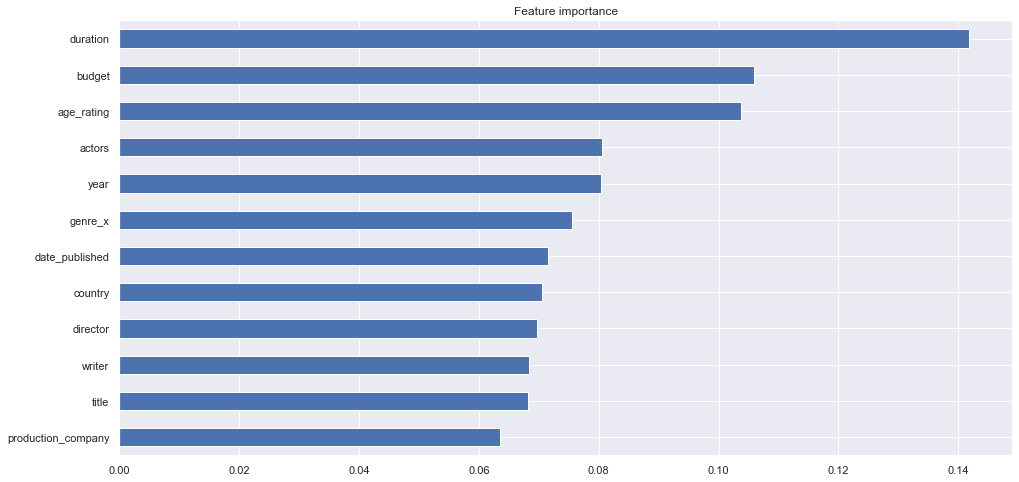

In [27]:
importances = pd.DataFrame(clf.feature_importances_, index=df_x.columns, columns=['importance']).sort_values(by='importance')
importances.plot.barh(figsize=(16,8), legend=None, title='Feature importance')

In [ ]:
plot_importance(clf)
pyplot.show()
#budget
#genre
#duration
#director
#date_published
#

#actors least

In [ ]:
df_x.columns


### Tuning XgBoost

In [ ]:
param_test2 = {
 'max_depth':[0,1,2,3,4,5,6,7,8,9,10],
 'min_child_weight':[0,1,2,3,4,5,6,7,8,9,10],
 'learning_rate':[.01,.02,.03,.04,.05]
    
    
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier(missing=np.nan, max_depth=9, 
                        n_estimators=2000, learning_rate=0.03, 
                        subsample=.74, colsample_bytree=0.75, seed=2100,objective= 'binary:logistic'), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_fit, y_fit, early_stopping_rounds=100,  eval_metric="logloss", eval_set=[(X_eval, y_eval)])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

### SVM

In [ ]:
sc = StandardScaler()
sc.fit(X_fit)
x_train_standardized, x_test_standardized = sc.transform(X_fit), sc.transform(X_eval)

In [ ]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print('For kernel parameter value:', kernel)
    svm = SVC(kernel=kernel, C=10)
    svm.fit(x_train_standardized, y_fit)
    y_pred = svm.predict(x_test_standardized)
    print('Misclassified samples: %d' % (y_eval != y_pred).sum())
    print('Accuracy: %.2f' % accuracy_score(y_eval, y_pred))
    print('_____')

### Logistic Regression 

# For Linear Data